<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Feature Engineering: Polynomials and Interactions
              
</p>
</div>

Data Science Cohort Live NYC June 2022
<p>Phase 2: Topic 20</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Feature Engineering: Transforming input data
- Input in form that the better conforms to structure of input-output relationship.
- Model interactions between features.

#### A key aspect to making a better prediction machine

- Target may not depend linearly on feature set.
- I.e. cant approximate well by a hyperplane.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
noise = norm.rvs(scale = 16, size = 400)
x = np.linspace(-7,7, 400) + 300
y = 3*(x-300)**2  + 4*(x-300) + 100 + noise
tempyield_data = pd.DataFrame({'Temp': x, 'Yield': y})

In [2]:
%%capture yieldvtemp
sns.set_context('talk')
fig, ax = plt.subplots()
sns.scatterplot(y ='Yield', x = 'Temp', data = tempyield_data, ax = ax)
ax.set_title('Yield vs. Temperature')
plt.show()

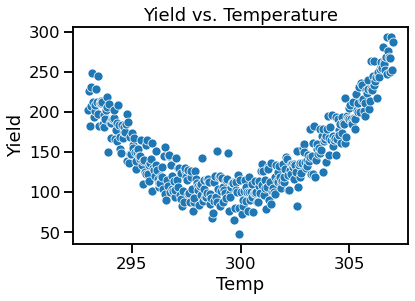

In [3]:
yieldvtemp()

Fitting yield to a model simply linear in temperature might be considered silly. 

What kind of dependence might we try?

In [4]:
tempyield_data.head()

,Temp,Yield
0,293.000000,202.421386
1,293.035088,225.488372
2,293.070175,182.081892
3,293.105263,207.187525
4,293.140351,231.524889


Perform a regression:
$$ Y = \beta_2T^2 + \beta_1T + \beta_0  $$

*Note*: this is still a model **linear** in coefficients. 

Construct another column that is $T^2$.

In [5]:
tempyield_data['Temp_squared'] = tempyield_data['Temp']**2
tempyield_data.head()

,Temp,Yield,Temp_squared
0,293.000000,202.421386,85849.000000
1,293.035088,225.488372,85869.562635
2,293.070175,182.081892,85890.127732
3,293.105263,207.187525,85910.695291
4,293.140351,231.524889,85931.265312


Linear regression of Yield on $T$ and $T^2$.

Doing a regression just on T. Silly but lets do it anyway to see:

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [7]:

X = tempyield_data['Temp']
y = tempyield_data['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

lr_simple = LinearRegression()
lr_simple.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [8]:
print(lr_simple.coef_, lr_simple.intercept_)

[4.11448965] -1083.384769606921


In [9]:
lr_simple.score(X_train.values.reshape(-1,1),
                y_train)

0.10793114418796845

In [10]:
y_pred = lr_simple.predict(X_test.values.reshape(-1,1))
mean_absolute_error(y_pred, y_test)

39.80517640079208

But saying there is no relation between temperature and yield is obviously a mistake!

Regression on $T$ and $T^2$.

In [11]:
X_poly = tempyield_data[['Temp', 'Temp_squared']]
y = tempyield_data['Yield']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3)

lr_poly = LinearRegression()
lr_poly.fit(X_train, y_train)

LinearRegression()

In [12]:
print(lr_poly.coef_, lr_poly.intercept_)

[-1848.34381468     3.08677788] 276791.19600185665


In [13]:
lr_poly.score(X_train, y_train)

0.9060424969894216

In [14]:
y_pred_poly = lr_poly.predict(X_test)
mean_absolute_error(y_pred_poly, y_test)

14.345405245877096

Let's visualize the difference in predictions:

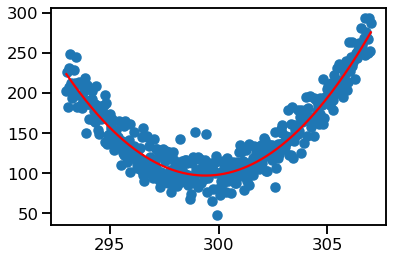

In [15]:
beta_1, beta_2 = lr_poly.coef_
beta_0 = lr_poly.intercept_

poly_pred = beta_2*X**2 + beta_1*X + beta_0

fig, ax = plt.subplots()
ax.plot(X, poly_pred, c ='r')
ax.scatter(X, y)
plt.show()

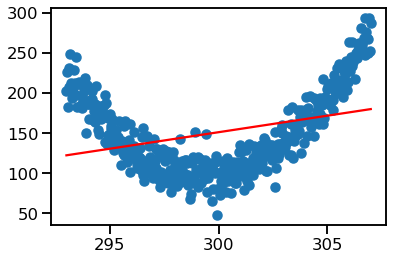

In [16]:
beta_1 = lr_simple.coef_[0]
beta_0 = lr_simple.intercept_

lin_pred = beta_1*X + beta_0

fig, ax = plt.subplots()
ax.plot(X, lin_pred, c ='r')
ax.scatter(X, y)
plt.show()

#### More generally

Target depend on feature with higher order polynomial. Procedure would be same.

$$ Y = \beta_0 + \beta_1 x + \beta_2 x^2 + ... + \beta_n x^n $$

Again:
- Construct feature columns for each power of x.
- Fit $\beta_i$ using linear regression.

#### Using scikit-learn: PolynomialFeatures with a single feature

- With single feature is easy/fast way to construct these features at higher power.
- Again, main advantage: can be used in a pipeline.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures()
- Takes arguments for highest order of polynomial
- Can chose to include zeroth power term for fitting bias (useful for statsmodels)

In [18]:
pf = PolynomialFeatures(degree = 3, include_bias = False )
X_to_second = pf.fit_transform(X.values.reshape(-1,1))
X_to_second[0:10]

array([[2.93000000e+02, 8.58490000e+04, 2.51537570e+07],
       [2.93035088e+02, 8.58695626e+04, 2.51627948e+07],
       [2.93070175e+02, 8.58901277e+04, 2.51718348e+07],
       [2.93105263e+02, 8.59106953e+04, 2.51808770e+07],
       [2.93140351e+02, 8.59312653e+04, 2.51899213e+07],
       [2.93175439e+02, 8.59518378e+04, 2.51989677e+07],
       [2.93210526e+02, 8.59724127e+04, 2.52080164e+07],
       [2.93245614e+02, 8.59929902e+04, 2.52170672e+07],
       [2.93280702e+02, 8.60135700e+04, 2.52261202e+07],
       [2.93315789e+02, 8.60341524e+04, 2.52351753e+07]])

And fitting is exactly the same as before.

#### PolynomialFeatures() with multiple features.

In [19]:
sales_df = pd.read_csv('Data/advertising.csv').drop(columns = ['Unnamed: 0'])
sales_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot:>

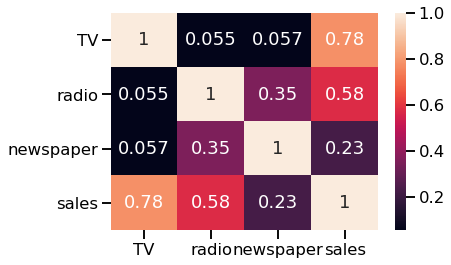

In [21]:
sns.heatmap(sales_df.corr(), annot = True)

Maybe want to model interactions

Recall that $$ Cov(Radio, Sales) \rightarrow Radio\times Sales $$

Average of product encodes correlation between the two.

Using products of features as new features:

- Factors pairwise correlations of original features into prediction.

Model:
$$ Sales = \beta_{TV} TV + \beta_{Radio} Radio + \beta_{Newspaper} Newspaper + \\ \beta^{int}_1 \Big( TV \times Radio \Big) + \beta^{int}_2 \Big( TV \times Newspaper \Big) + \beta^{int}_3 \Big(Radio \times Newspaper\Big) $$

In [22]:
X = sales_df[['TV', 'radio', 'newspaper']]
y = sales_df['sales']

PolynomialFeatures:
- has argument interaction_only = True/False.
- If true only takes interactions terms at highest order specified.

In [23]:
linear_withinteraction = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)

In [24]:
X_transformed = linear_withinteraction.fit_transform(X)
feat_names = pd.Series(linear_withinteraction.get_feature_names())
feat_names

0       x0
1       x1
2       x2
3    x0 x1
4    x0 x2
5    x1 x2
dtype: object

In [25]:
map_dict = {'x0': 'TV', 'x1': 'Radio', 'x2': 'Newspaper'}
for key, value in map_dict.items():
    feat_names = feat_names.str.replace(key, value)

X_trans_df = pd.DataFrame(X_transformed)
X_trans_df.columns = feat_names

After pandafying our numpy array:

In [26]:
X_trans_df.head()

,TV,Radio,Newspaper,TV Radio,TV Newspaper,Radio Newspaper
0,230.1,37.8,69.2,8697.78,15922.92,2615.76
1,44.5,39.3,45.1,1748.85,2006.95,1772.43
2,17.2,45.9,69.3,789.48,1191.96,3180.87
3,151.5,41.3,58.5,6256.95,8862.75,2416.05
4,180.8,10.8,58.4,1952.64,10558.72,630.72


Looks good. Let's standardize the variables and analyze the weights of the factors and their interactions.

In [27]:
X_trans_standard = X_trans_df.apply(lambda x: (x - x.mean())/x.std() )
y_standard = (y - y.mean())/y.std()

In [28]:
import statsmodels.api as sm
results = sm.OLS(y_standard, X_trans_standard).fit()

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              998.4
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                   6.59e-143
Time:                        12:05:38   Log-Likelihood:                          62.907
No. Observations:                 200   AIC:                                     -113.8
Df Residuals:                     194   BIC:                                     -94.02
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
TV                  0.3345      0.026     12.666      0.000       0.282       0.387
Radio               0.0652      0.032      2.014      0.045       0.001       0.129
Newspaper           0.0711      0.042      1.696      0.092      -0.012       0.154
TV Radio            0.7338      0.037     19.981      0.000       0.661       0.806
TV Newspaper       -0.0744      0.033     -2.233      0.027      -0.140      -0.009
Radio Newspaper    -0.0197      0.042     -0.465      0.642      -0.103       0.064
==============================================================================
Omnibus:                      111.385   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.483
Skew:                          -2.046   Prob(JB):                    2.20e-167
Kurtosis:                      11.681   Cond. No.                         8.72
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

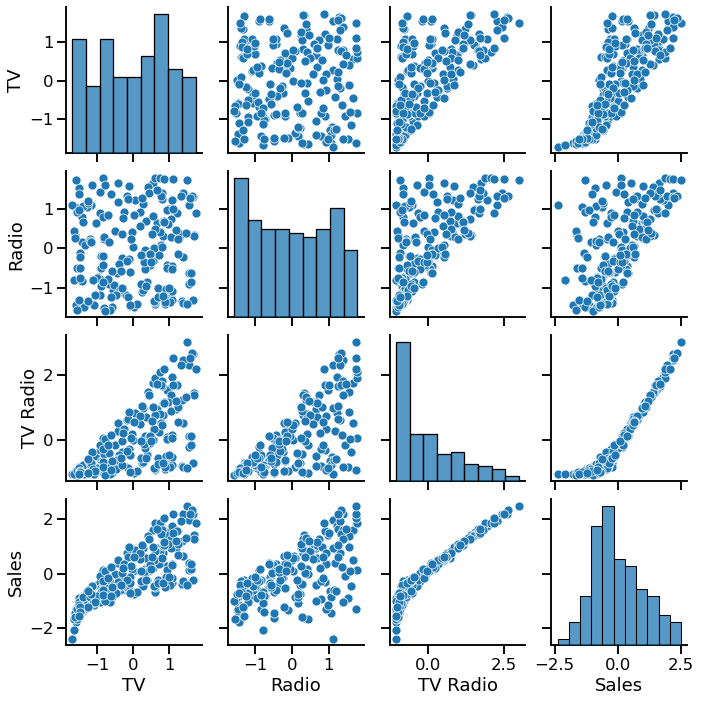

In [32]:
trans_with_inter = X_trans_standard.loc[:,['TV', 'Radio', 'TV Radio']]
trans_with_inter['Sales'] = y_standard

sns.pairplot(trans_with_inter)

Might do even better by modeling the knees in the feature set and constructing a new feature.
- Splines
- Trend filters
- etc.

Look it up.

Some words of advice:
- Adding interactions and higher order terms can be useful.
- But they can also add extra variables that can lead to overfitting or useless parameters.
- Be careful and use your judgment.

#### Also: interaction terms not always interpretable. But may lead to better predictions.

Takeaway:
- This is where EDA is really important:
    - Visualization
    - Descriptive statistics 
    - Correlation matrices
    - Playing with your data!
    
See what transformations and functional relations useful for model inference and prediction.

Be the sculptor.

<center><img src = "Images/rodin_sculptor.jpg" width = 500/></center>
<center>Rodin in his nightie.</center>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_trans_df, y, test_size = 0.3)

In [40]:
lr = LinearRegression().fit(X_train, y_train)

In [41]:
lr.score(X_train, y_train)

0.9060424969894216

In [42]:
lr.score(X_test, y_test)

0.8646210435145967

In [43]:
y_train_hat = lr.predict(X_train)

In [45]:
mean_absolute_error(y_train_hat, y_train)

12.474748449733905

In [46]:
y_test_hat = lr.predict(X_test)

In [47]:
mean_absolute_error(y_test_hat, y_test)

14.345405245877096